In [14]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [3]:

tickers = 'NVDA'
data = yf.download(tickers, start="2020-01-01", end="2025-01-30")
data.tail()
start_date = '2020-01-01'

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
data['Gain/Loss'] = np.where(data['Close'] > data['Close'].shift(1), 'Gain', 'Loss')
data

Price,Close,High,Low,Open,Volume,Gain/Loss
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,
Date,,,,,,
2020-01-02,5.972711,5.972711,5.893294,5.943832,237536000,Loss
2020-01-03,5.877111,5.920927,5.828066,5.852962,205384000,Loss
2020-01-06,5.901758,5.906986,5.757613,5.783753,262636000,Gain
2020-01-07,5.973208,6.019016,5.885078,5.930139,314856000,Gain
2020-01-08,5.984412,6.025739,5.928895,5.968976,277108000,Gain
...,...,...,...,...,...,...
2025-01-23,147.220001,147.229996,143.720001,145.050003,155915500,Gain
2025-01-24,142.619995,148.970001,141.880005,148.369995,234657600,Loss


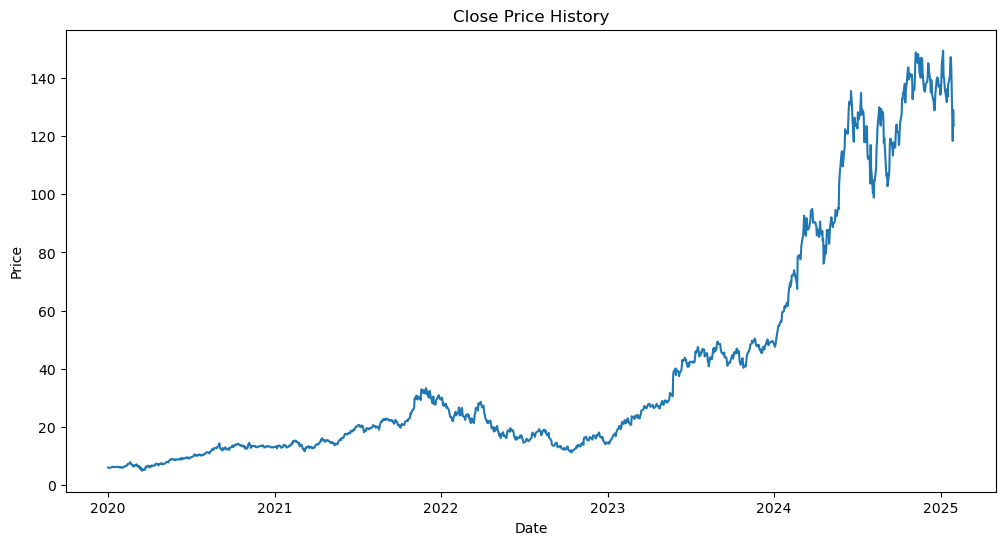

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price history')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [6]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
count,1276.000000,1276.000000,1276.000000,1276.000000,1.276000e+03
mean,39.839132,40.584049,39.031414,39.853898,4.445523e+08
std,39.721938,40.480411,38.936054,39.806701,1.883689e+08
min,4.892426,5.229713,4.500832,4.984594,9.788400e+07
25%,13.606188,13.875261,13.355801,13.711380,3.033396e+08
50%,21.700230,22.085735,21.105908,21.588796,4.181150e+08
75%,46.553782,47.073851,45.334108,46.467157,5.453080e+08
max,149.429993,153.130005,147.820007,153.029999,1.543911e+09


## Plots:

We currently have 2 plots that demonstrate:
- History/ average prices by sector
- Each sector's market share

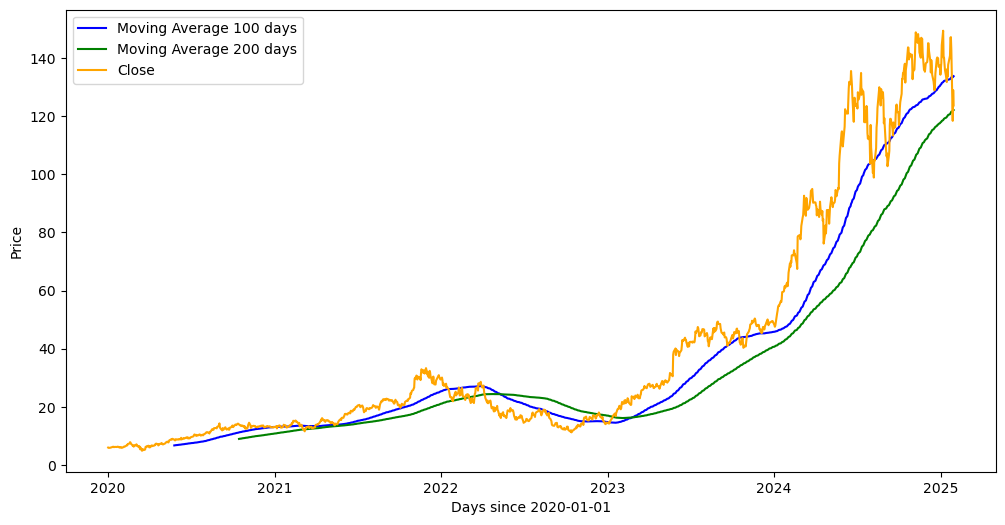

In [7]:
# Plotting the data and the moving averages
avg1 = data['Close'].rolling(100).mean()
avg2 = data['Close'].rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(avg1, 'blue', label='Moving Average 100 days')
plt.plot(avg2, 'green', label='Moving Average 200 days')
plt.plot(data['Close'], 'orange', label='Close')
plt.legend(loc='upper left')
plt.xlabel(f'Days since {start_date}')
plt.ylabel('Price')
plt.show()


Market Share Breakdown for 2024-02-26:       [M->Millions, B->Billions, T->Trillions]
Total Market Capitalization: $13.5T
Technology: $5.7T (42.19%)
Consumer Cyclical: $2.5T (18.52%)
Healthcare: $1.7T (12.71%)
Financial Services: $1.5T (11.29%)
Energy: $982.9B (7.26%)
Communication Services: $799.5B (5.90%)
Industrials: $289.7B (2.14%)


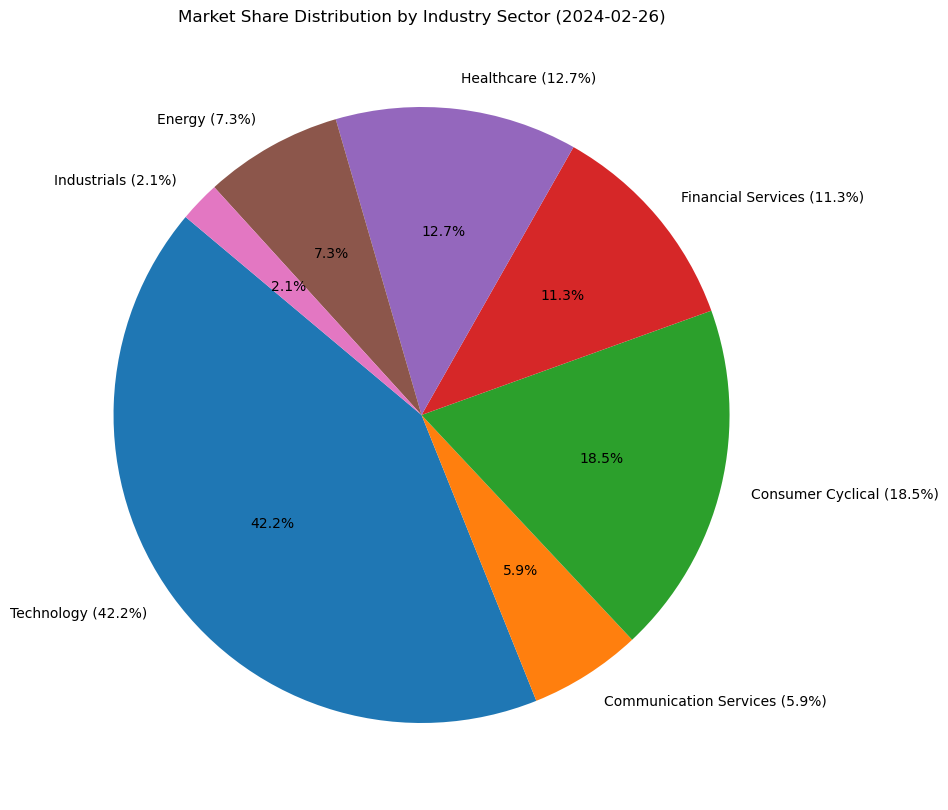


Returned Data: {'total_market_cap': 13546442248504.758, 'industry_market_caps': defaultdict(<class 'float'>, {'Technology': 5715303641639.1875, 'Communication Services': 799547500870.875, 'Consumer Cyclical': 2508646068105.843, 'Financial Services': 1529203914913.1562, 'Healthcare': 1721137478584.2866, 'Energy': 982897813716.6074, 'Industrials': 289705830674.8008}), 'industry_percentages': {'Technology': 42.19044038865656, 'Communication Services': 5.9022692911057755, 'Consumer Cyclical': 18.518855520036965, 'Financial Services': 11.28860173660688, 'Healthcare': 12.705457617657977, 'Energy': 7.255763511080547, 'Industrials': 2.138611934855281}}


In [8]:
# Plotting 
from collections import defaultdict
from datetime import datetime, timedelta
def human_readable(num):
    """Converts large numbers to human-readable format (e.g., 1.2B, 32.5M)"""
    if num >= 1_000_000_000_000:
        return f"{num / 1_000_000_000_000:.1f}T"
    if num >= 1_000_000_000:
        return f"{num / 1_000_000_000:.1f}B"
    elif num >= 1_000_000:
        return f"{num / 1_000_000:.1f}M"
    else:
        return f"{num:,.2f}"

def plot_market_share_by_sector(date: str, tickers=None):
    """
    Generates a pie chart of market share distribution by industry sector for a given date
    and prints additional statistics in a human-readable format.

    Parameters:
        date (str): The target date in 'YYYY-MM-DD' format.
        tickers (list, optional): List of company tickers to analyze.
    
    Returns:
        dict: Contains sector market caps, total market cap, and percentage breakdown.
    """
    if tickers is None:
        tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA',  # Tech
                   'JPM', 'V', 'BAC', 'WFC', 'GS',  # Finance
                   'JNJ', 'PFE', 'MRNA', 'UNH', 'LLY',  # Healthcare
                   'XOM', 'CVX', 'BP', 'COP', 'PSX',  # Energy
                   'UPS', 'FDX', 'CSX', 'NSC', 'DPZ']  # Shipping/Transport

    industry_data = defaultdict(float)
    
    # Convert string date to datetime and get the next day
    target_date = datetime.strptime(date, "%Y-%m-%d")
    next_day = target_date + timedelta(days=1)
    
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        info = stock.info
        industry = info.get('sector', 'Unknown')  # Get sector
        
        # Fetch historical price around the given date
        try:
            historical_data = stock.history(start=date, end=next_day.strftime("%Y-%m-%d"))
            
            if historical_data.empty:
                print(f"Skipping {ticker}: No data for {date}")
                continue
            
            close_price = historical_data['Close'].iloc[0]  # Closing price
            shares_outstanding = info.get('sharesOutstanding', 0)  # Number of shares
            
            market_cap = close_price * shares_outstanding  # Calculate market cap
            
            if market_cap > 0:
                industry_data[industry] += market_cap
        
        except Exception as e:
            print(f"Skipping {ticker}: Error fetching data - {e}")

    # If no valid data was retrieved, return
    if not industry_data:
        print("No valid market cap data found for the given date.")
        return
    
    # Calculate total market cap
    total_market_cap = sum(industry_data.values())

    # Generate percentage breakdown
    industry_percentages = {sector: (cap / total_market_cap) * 100 for sector, cap in industry_data.items()}
    
    # Print statistics with human-readable formatting
    print(f"\nMarket Share Breakdown for {date}:       [M->Millions, B->Billions, T->Trillions]")
    print(f"Total Market Capitalization: ${human_readable(total_market_cap)}")
    
    for sector, cap in sorted(industry_data.items(), key=lambda x: x[1], reverse=True):
        percentage = industry_percentages[sector]
        print(f"{sector}: ${human_readable(cap)} ({percentage:.2f}%)")

    # Extract labels and sizes for the pie chart
    labels = [f"{sector} ({percentage:.1f}%)" for sector, percentage in industry_percentages.items()]
    sizes = industry_data.values()

    # Create pie chart
    plt.figure(figsize=(10, 10))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f"Market Share Distribution by Industry Sector ({date})")
    plt.show()
    
    return {
        "total_market_cap": total_market_cap,
        "industry_market_caps": industry_data,
        "industry_percentages": industry_percentages
    }

# Example usage:
stats = plot_market_share_by_sector("2024-02-26")

# Example of accessing returned data:
if stats:
    print("\nReturned Data:", stats)

## Central Motivation for project
 - Useable tool to help people navigate the stock market
 - See if there is a correlation between price movement in different sectors
 - Predict stock prices based off historical data 

## 2 Key Questions
- Is there a correlation between the performance of different sectors/industries?
- Can you reasonably predict stock price based only on past stock data?


In [9]:
tickers = [
    "AAPL",  # Apple
    "MSFT",  # Microsoft
    "GOOGL", # Alphabet (Google)
    "AMZN",  # Amazon
    "TSLA",  # Tesla
    "META",  # Meta (formerly Facebook)
    "NVDA",  # NVIDIA
    "BABA",  # Alibaba
    "SPY",   # S&P 500 ETF
    "V",     # Visa
]
 

data_list = []

for ticker in tickers:
    stock = yf.Ticker(ticker)
    hist = stock.history(period="5y")  
    hist["Ticker"] = ticker  
    stock_info = stock.info

    hist['Sector'] = stock_info.get('sector', 'None')
    hist['Industry'] = stock_info.get('industry', 'None')
    data_list.append(hist)

df = pd.concat(data_list)
df.reset_index(inplace=True)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,Sector,Industry,Capital Gains
0,2020-02-28 00:00:00-05:00,62.431618,67.564279,62.215630,66.338745,426510000,0.0,0.0,AAPL,Technology,Consumer Electronics,NaN
1,2020-03-02 00:00:00-05:00,68.503432,73.153162,67.396816,72.514915,341397200,0.0,0.0,AAPL,Technology,Consumer Electronics,NaN
2,2020-03-03 00:00:00-05:00,73.694352,73.774433,69.357671,70.211906,319475600,0.0,0.0,AAPL,Technology,Consumer Electronics,NaN
3,2020-03-04 00:00:00-05:00,71.939776,73.628820,71.136509,73.468651,219178400,0.0,0.0,AAPL,Technology,Consumer Electronics,NaN
4,2020-03-05 00:00:00-05:00,71.716508,72.694504,70.719101,71.085548,187572800,0.0,0.0,AAPL,Technology,Consumer Electronics,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12566,2025-02-21 00:00:00-05:00,350.489990,353.320007,347.480011,348.529999,6924100,0.0,0.0,V,Financial Services,Credit Services,NaN
12567,2025-02-24 00:00:00-05:00,348.760010,350.799988,347.359985,349.859985,5055900,0.0,0.0,V,Financial Services,Credit Services,NaN
12568,2025-02-25 00:00:00-05:00,351.369995,352.589996,346.000000,352.089996,6191900,0.0,0.0,V,Financial Services,Credit Services,NaN
12569,2025-02-26 00:00:00-05:00,350.000000,351.829987,348.989990,350.630005,5960600,0.0,0.0,V,Financial Services,Credit Services,NaN


In [10]:
group = 'Sector'
grouped_data = df[['Date', 'Close', group]].groupby(['Date', group]).mean()
grouped_data.reset_index(inplace=True)

In [15]:
fig = px.line(grouped_data, x='Date', y='Close', color=group, 
              title = f'Historical adjusted close price of stocks, grouped by {group}',
              labels = {
                  'date' : 'Date',
                  'close' : 'Closing price (adjusted)'
                })
fig

[*********************100%***********************]  5 of 5 completed


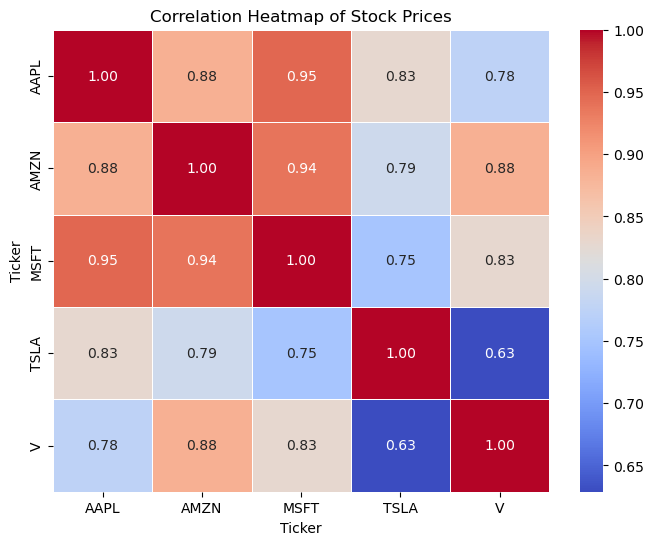

In [16]:
# Download stock data for multiple stocks
tickers = ['AAPL', 'MSFT', 'TSLA', 'AMZN','V']
stock_data = yf.download(tickers, start='2023-01-01', end='2024-01-01')['Close']

# Calculate correlations
correlation = stock_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Stock Prices")
plt.show()

Shows us which stocks tend to move together, and how someone can diversify their portfolio if they pick stocks with 0 or negative correlations. 